In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
x = df.drop(columns=['quality'])
y = df.quality

In [4]:
from sklearn.ensemble import BaggingClassifier
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size= 0.2 , random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [5]:
bag_dt = BaggingClassifier(DecisionTreeClassifier() , n_estimators=  10)

In [6]:
bag_dt.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [7]:
bag_dt.predict(x_test)

array([5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6, 6, 7, 5, 5, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 7, 5,
       7, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 7, 5, 6, 6, 7, 5, 6,
       7, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       7, 5, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 6, 7, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 7, 5, 5, 7, 6, 6, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 5, 7, 5, 5, 4, 5, 7, 7, 5, 5, 7, 6, 5, 6, 5, 6, 5,
       5, 6, 6, 7, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 7, 5, 7, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 4, 5, 6, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [8]:
print("TRAINING ACCURACY :-", bag_dt.score(x_train, y_train)*100)
print("TEST ACCURACY :- ", bag_dt.score(x_test, y_test)*100)

TRAINING ACCURACY :- 97.57623143080532
TEST ACCURACY :-  61.875


In [9]:
bag_dt.base_estimator_  ##    which Technique we are using 

DecisionTreeClassifier()

In [10]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [11]:
bag_dt.estimator_params   ###  what Parameter we are using

()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
bag_knn = BaggingClassifier(KNeighborsClassifier() , n_estimators=10)
bag_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier())

In [13]:
bag_knn.base_estimator_  # WHICH MODEL/ALGORITHM WE ARE USING 

KNeighborsClassifier()

In [14]:
bag_knn.estimator_params   ## WHICH PARAMETER WE ARE USING 

()

In [15]:
bag_knn.predict(x_test)

array([6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 7, 5, 5, 7, 5, 7, 5,
       5, 7, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 5, 5, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6,
       7, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 7, 5, 6, 5, 5, 6,
       6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 5,
       6, 5, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 7, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 6, 5, 6, 6, 7, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5,
       7, 6, 5, 7, 5, 6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 5, 5, 5, 6, 7, 5, 5, 5, 4, 5, 7, 5, 6, 7, 6, 6, 6, 6, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 6, 7, 6, 5, 6, 5, 6, 5, 5, 6, 5,
       6, 7, 6, 7, 5, 5, 7, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 7,
       6, 7, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 7, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5,

In [16]:
print("TRAINING ACCURACY :-", bag_knn.score(x_train, y_train)*100)
print("TEST ACCURACY :- ", bag_knn.score(x_test, y_test)*100)

TRAINING ACCURACY :- 70.6020328381548
TEST ACCURACY :-  49.0625


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=4 , verbose=1) ## BY DEFAUL RANDOM FOREST  TAKE 100 TREE BUT HERE WE ARE TAKING ONLY 10 TREE
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


RandomForestClassifier(n_estimators=4, verbose=1)

In [18]:
rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 7, 5, 5, 6, 5, 4, 6, 6, 5, 5, 7, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 7, 5, 5, 6, 5, 5, 3, 7, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5, 7, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 5, 7, 5, 5, 5, 5, 6, 7, 5, 5, 6, 6, 4, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5,
       6, 7, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 4, 5, 6, 7, 6, 7, 5, 5, 5, 5, 7,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 7, 6, 5,

In [19]:
print("TRAINING ACCURACY :-", rf.score(x_train, y_train)*100)
print("TEST ACCURACY :- ", rf.score(x_test, y_test)*100)

TRAINING ACCURACY :- 93.74511336982017
TEST ACCURACY :-  63.74999999999999


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


In [20]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1483505686),
 DecisionTreeClassifier(max_features='sqrt', random_state=2085093587),
 DecisionTreeClassifier(max_features='sqrt', random_state=638095672),
 DecisionTreeClassifier(max_features='sqrt', random_state=959354222)]

[Text(0.43121995192307694, 0.975, 'X[1] <= 0.412\ngini = 0.655\nsamples = 805\nvalue = [12, 56, 546, 485, 167, 13]'),
 Text(0.16392773892773893, 0.925, 'X[10] <= 10.75\ngini = 0.673\nsamples = 225\nvalue = [0, 13, 80, 161, 106, 6]'),
 Text(0.06398601398601399, 0.875, 'X[10] <= 9.55\ngini = 0.614\nsamples = 104\nvalue = [0, 8, 65, 81, 13, 2]'),
 Text(0.024242424242424242, 0.825, 'X[4] <= 0.086\ngini = 0.529\nsamples = 34\nvalue = [0, 3, 32, 17, 1, 0]'),
 Text(0.020512820512820513, 0.775, 'X[7] <= 0.997\ngini = 0.58\nsamples = 26\nvalue = [0, 3, 21, 17, 1, 0]'),
 Text(0.011188811188811189, 0.725, 'X[2] <= 0.335\ngini = 0.457\nsamples = 10\nvalue = [0, 3, 12, 2, 0, 0]'),
 Text(0.007459207459207459, 0.675, 'X[8] <= 3.35\ngini = 0.245\nsamples = 9\nvalue = [0, 0, 12, 2, 0, 0]'),
 Text(0.0037296037296037296, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 9, 0, 0, 0]'),
 Text(0.011188811188811189, 0.625, 'X[9] <= 0.525\ngini = 0.48\nsamples = 2\nvalue = [0, 0, 3, 2, 0, 0]'),
 Text(0.00745920

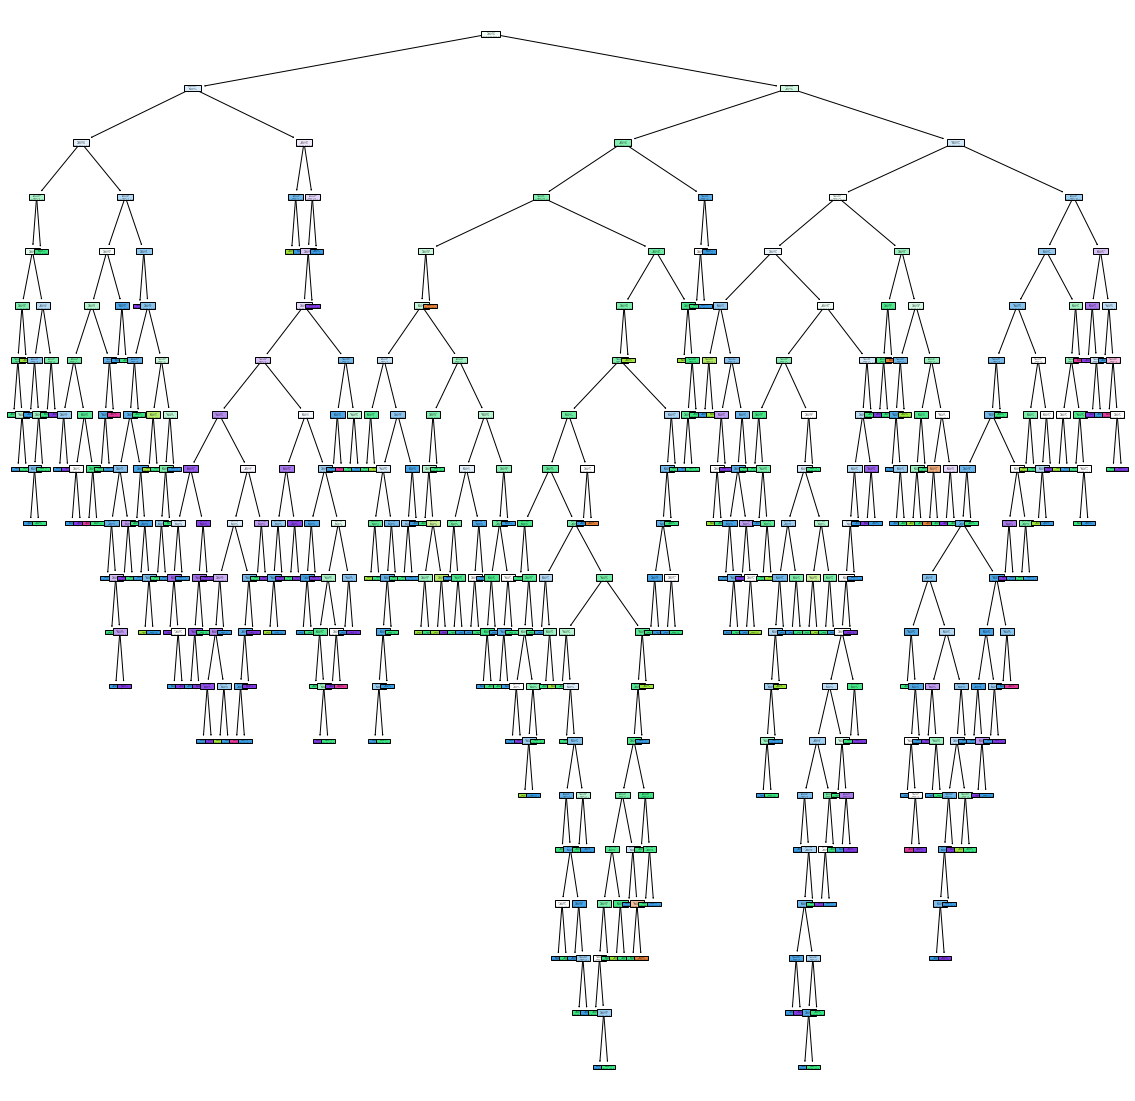

In [21]:
## NOW WE WILL TRY TO PLOT THE FIRST TREE
plt.figure(figsize= (20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

[Text(0.41597380569677034, 0.975, 'X[7] <= 0.996\ngini = 0.632\nsamples = 798\nvalue = [14, 37, 543, 535, 139, 11]'),
 Text(0.15669856459330145, 0.925, 'X[4] <= 0.072\ngini = 0.635\nsamples = 209\nvalue = [3, 11, 70, 174, 66, 6]'),
 Text(0.10741626794258373, 0.875, 'X[2] <= 0.275\ngini = 0.597\nsamples = 122\nvalue = [0, 8, 22, 113, 51, 5]'),
 Text(0.07368421052631578, 0.825, 'X[1] <= 0.913\ngini = 0.51\nsamples = 76\nvalue = [0, 8, 20, 88, 14, 1]'),
 Text(0.05550239234449761, 0.775, 'X[9] <= 0.625\ngini = 0.493\nsamples = 74\nvalue = [0, 7, 18, 88, 14, 1]'),
 Text(0.03062200956937799, 0.725, 'X[0] <= 6.5\ngini = 0.602\nsamples = 39\nvalue = [0, 7, 16, 38, 6, 0]'),
 Text(0.015311004784688996, 0.675, 'X[10] <= 12.225\ngini = 0.458\nsamples = 18\nvalue = [0, 0, 11, 20, 0, 0]'),
 Text(0.011483253588516746, 0.625, 'X[8] <= 3.515\ngini = 0.475\nsamples = 12\nvalue = [0, 0, 11, 7, 0, 0]'),
 Text(0.007655502392344498, 0.575, 'X[4] <= 0.057\ngini = 0.42\nsamples = 7\nvalue = [0, 0, 3, 7, 0, 0]

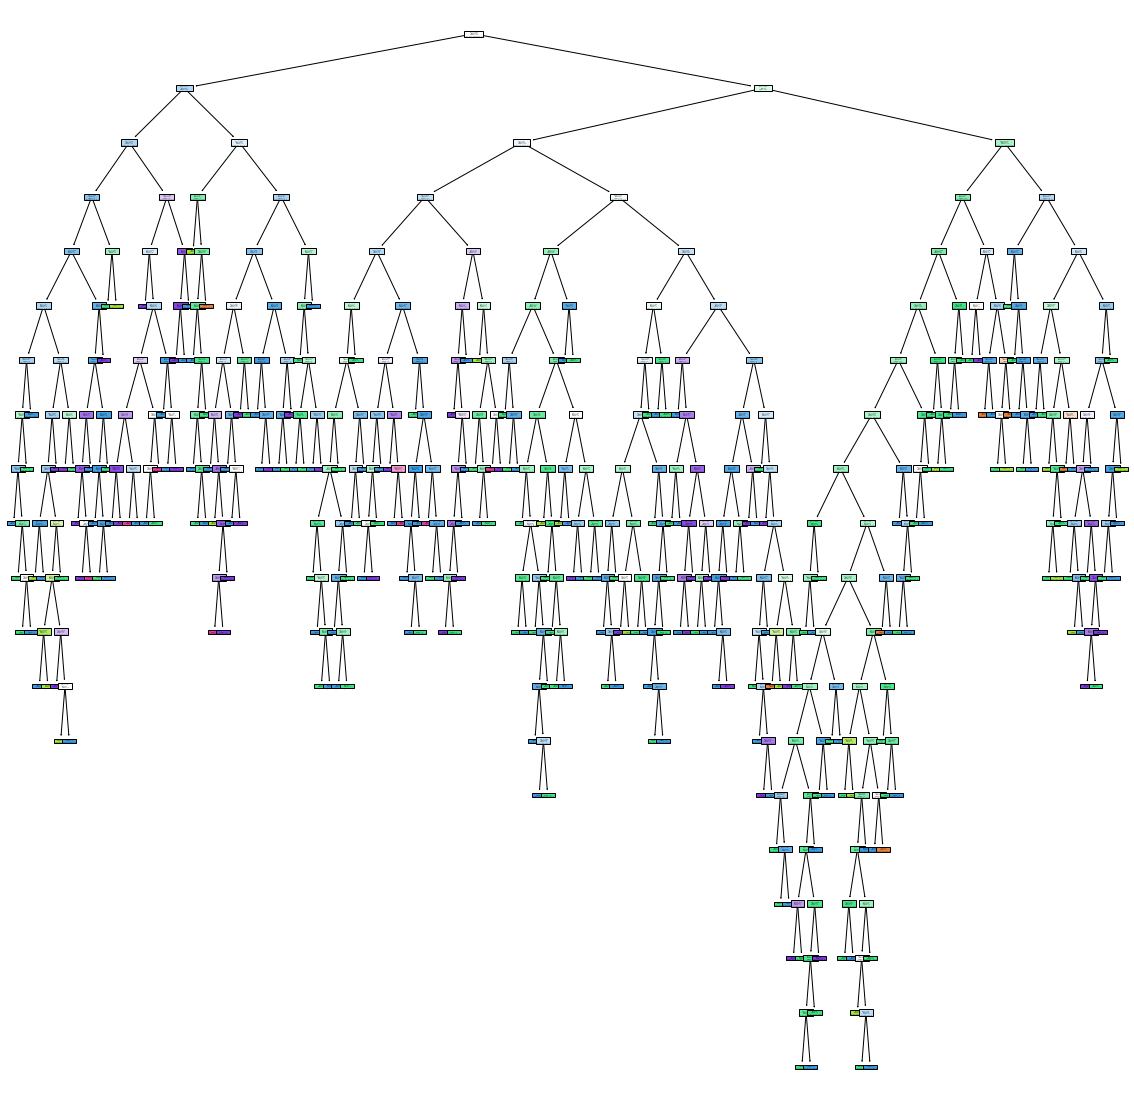

In [22]:
plt.figure(figsize= (20,20))
tree.plot_tree(rf.estimators_[1],filled=True)

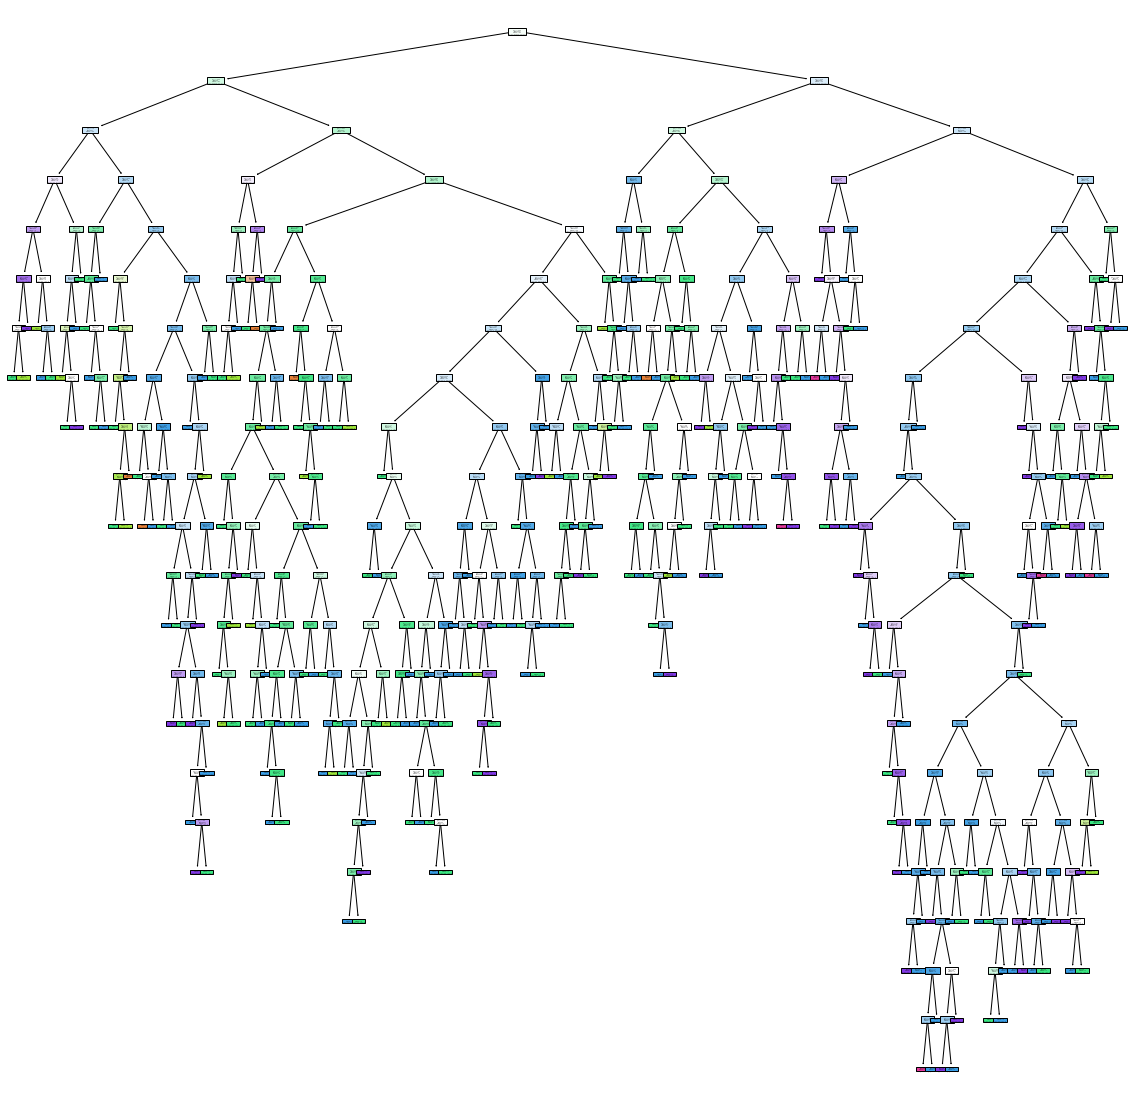

In [23]:
plt.figure(figsize = (20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i] , filled = True )

### GRID SEARCH 

In [24]:
rf = RandomForestClassifier()
grid_param = {"n_estimators" : [5, 200],
             'criterion' :['gini' ,'entropy'],
             'max_depth':range(3), 
             'min_samples_leaf':range(3)}
grid_search_rf = GridSearchCV(estimator = rf , param_grid = grid_param , verbose=1, cv = 10  )


In [25]:
# grid_serach_rf = GridSearchCV(param_grid= grid_pram, cv = 10 , n_jobs=6,verbose=1 ,estimator = rf)

In [26]:
grid_search_rf.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\s

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 3),
                         'min_samples_leaf': range(0, 3),
                         'n_estimators': [5, 200]},
             verbose=1)

In [27]:
grid_search_rf.best_estimator_ ## To know the parameters

RandomForestClassifier(max_depth=2, n_estimators=200)

In [28]:
grid_search_rf.best_params_   ## TO KNOW WHICH PARAMETERS WE ARE USING

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [29]:
rf_new = RandomForestClassifier(criterion = 'entropy', max_depth = 2, min_samples_leaf=1 , n_estimators = 200)

In [30]:
rf_new.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=200)

In [31]:
rf_new.predict(x_test)   ### PREDICTING THE TEST  DATA  

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6,
       6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5,

In [32]:
np.array(y_test)   ### ACTUAL DATA

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [33]:
print("TRAINING ACCURACY :-", rf_new.score(x_train, y_train)*100)
print("TEST ACCURACY :- ", rf_new.score(x_test, y_test)*100)

TRAINING ACCURACY :- 59.57779515246286
TEST ACCURACY :-  53.43750000000001


### NOW USING THE ANOTHER PARAMETERS

In [34]:
rf_new2 = RandomForestClassifier(criterion='entropy' , max_depth=9 , min_samples_leaf= 1 , n_estimators=120, verbose=1)
rf_new2.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.6s finished


RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120,
                       verbose=1)

In [35]:
rf_new2.predict(x_test)   ### PREDICTING THE TEST DATA

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       7, 5, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 5,
       7, 5, 7, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 8, 5, 5, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 7, 5, 7, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [36]:
np.array(y_test)  ### ACTUAL DATA

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [37]:
print("TRAINING ACCURACY :-", rf_new2.score(x_train, y_train)*100)
print("TEST ACCURACY :- ", rf_new2.score(x_test, y_test)*100)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TRAINING ACCURACY :- 93.58874120406567
TEST ACCURACY :-  62.5


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


### NOW PLOTTING THE FIRST TREE OF THE RANDOM FOREST

[Text(0.5549754299754299, 0.95, 'X[10] <= 10.525\nentropy = 1.697\nsamples = 831\nvalue = [9, 39, 533, 520, 168, 10]'),
 Text(0.33699324324324326, 0.85, 'X[5] <= 31.5\nentropy = 1.342\nsamples = 502\nvalue = [6, 26, 459, 266, 22, 0]'),
 Text(0.2648955773955774, 0.75, 'X[6] <= 94.5\nentropy = 1.341\nsamples = 458\nvalue = [4, 22, 405, 262, 21, 0]'),
 Text(0.18335380835380835, 0.65, 'X[1] <= 0.535\nentropy = 1.395\nsamples = 408\nvalue = [4, 22, 331, 258, 21, 0]'),
 Text(0.09090909090909091, 0.55, 'X[4] <= 0.075\nentropy = 1.335\nsamples = 189\nvalue = [0, 3, 126, 141, 17, 0]'),
 Text(0.05036855036855037, 0.45, 'X[9] <= 0.715\nentropy = 1.457\nsamples = 57\nvalue = [0, 3, 23, 52, 9, 0]'),
 Text(0.02457002457002457, 0.35, 'X[6] <= 48.0\nentropy = 1.205\nsamples = 36\nvalue = [0, 3, 17, 31, 0, 0]'),
 Text(0.009828009828009828, 0.25, 'X[4] <= 0.058\nentropy = 1.125\nsamples = 28\nvalue = [0, 1, 17, 23, 0, 0]'),
 Text(0.004914004914004914, 0.15, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0,

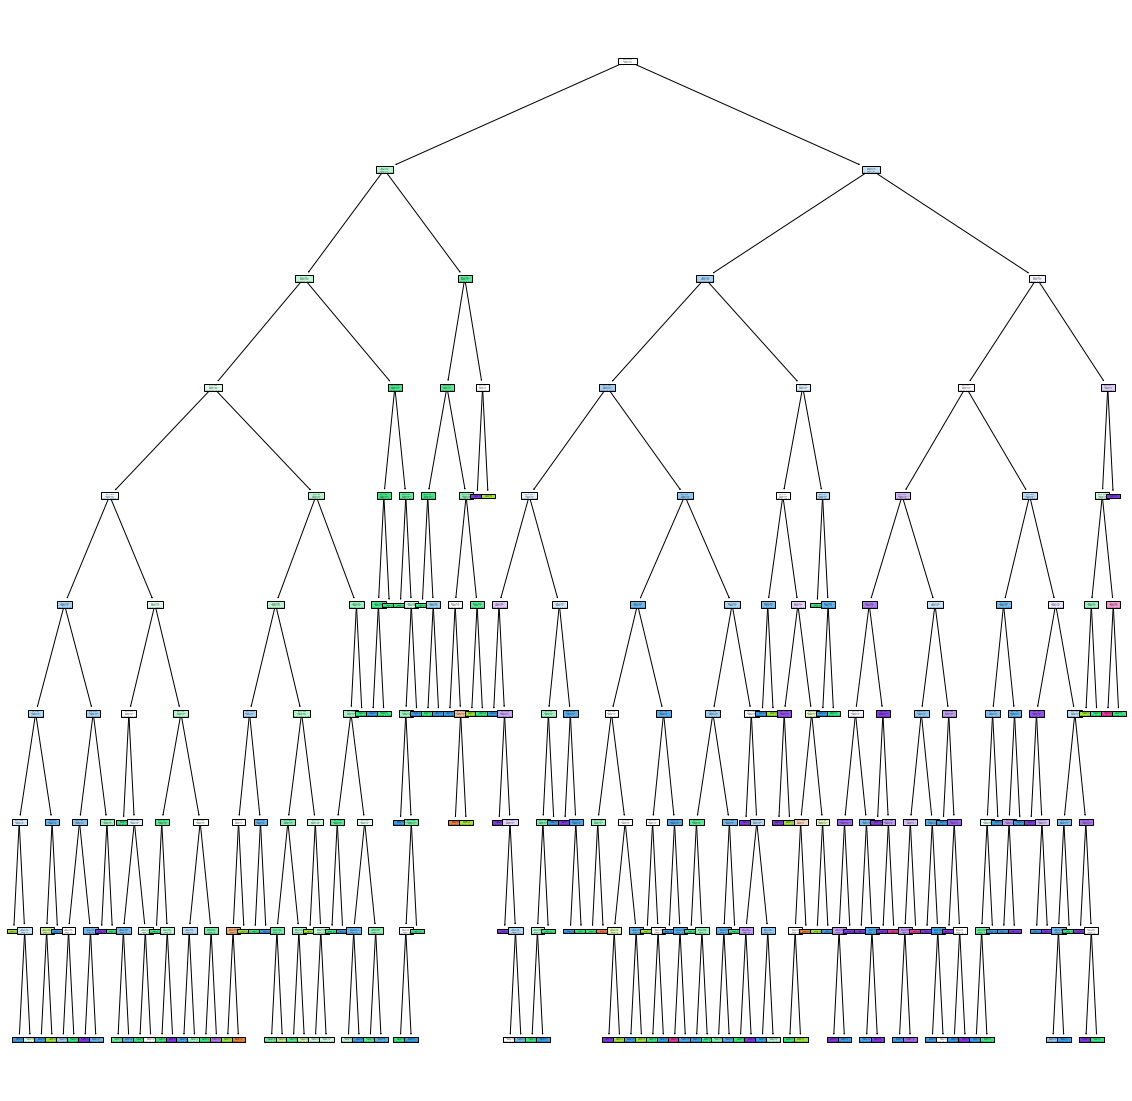

In [38]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf_new2.estimators_[0] , filled = True )

In [39]:
print_score(rf_new2, x_train, y_train, x_test, y_test, train=True)
print_score(rf_new2, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 93.59%
_______________________________________________
CLASSIFICATION REPORT:
             3          4           5           6           7     8  accuracy  \
precision  1.0   1.000000    0.905724    0.946392    1.000000   1.0  0.935887   
recall     1.0   0.860465    0.976407    0.907115    0.898089   1.0  0.935887   
f1-score   1.0   0.925000    0.939738    0.926337    0.946309   1.0  0.935887   
support    9.0  43.000000  551.000000  506.000000  157.000000  13.0  0.935887   

             macro avg  weighted avg  
precision     0.975353      0.938177  
recall        0.940346      0.935887  
f1-score      0.956231      0.935784  
support    1279.000000   1279.000000  
_______________________________________________
Confusion Matrix: 
 [[  9   0   0   0   0   0]
 [  0  37   6   0   0   0]
 [  0   0 538  13   0   0]
 [  0   0  47 459   0   0]
 [  0   0   3  13 141   0]
 [  0   0   0   0   0  13]]

Test Result:
Accuracy Score: 62.50%
_______________________

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Pyt